In [29]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib import animation
import time
from IPython.display import clear_output
"""Constantes"""

WINFEK = 0.7
#RADIUS = 5
#ALPHA = 0.8
#DAYS = 5

In [2]:
def getIndexCoordinate(array, coordinate):
    try:
        index = np.where(np.all(array == coordinate, axis=1))
    except:
        print(f"arr: {array}, coord: {coordinate}")
    #print(np.all(array==coordinate, axis=1))
    #print(f"Iiih index: {index}")
    return index[0]

In [3]:
def updateRowHuman(coordinate, value):
    global humanNP
    global infectHuman
    global imune
    #print(f"value: {value}")
    #index = getIndexCoordinate(humanNP, coordinate)
    index = int(value[0])
    #print()
    #print(f"Coordenadas: {coordinate}")
    #print(f"index: {index}")
    
    if int(value[-1]) == 0:
        #print(infectHuman, value)
        
        #print(f"Deletei: {coordinate} | idx: {idx}")
        #print(infectHuman)
        
        if [value[0], -1] not in imune.tolist():
            idx = getIndexCoordinate(infectHuman, coordinate)
            infectHuman = np.delete(infectHuman, idx[0], axis=0)
            imune = np.append(imune, [[value[0], -5]], axis=0)
            humanNP[index] = [value[0], value[1], value[2], -5]
        else:
            idxImune = getIndexCoordinate(imune, [value[0], 0])
            try:
                humanNP[index][-1] = 0
            except:
                print(1)
            try:
                imune = np.delete(imune, idxImune, axis=0)
            except:
                print(2, idxImune)
                a = input("Continuar 2?: ")
    elif int(value[-1]) == DAYS:
        humanNP[index] = value
        infectHuman = np.append(infectHuman, [value], axis=0 )
        #print(f"Adicionei {value} na lista")
    elif int(value[-1]) < 0:
        idxImune =  getIndexCoordinate(imune, [value[0], value[-1]-1])
        imune[idxImune] = [value[0], value[-1]]
        humanNP[index][-1] = value[-1]

    else:
        humanNP[index] = value
        idx = getIndexCoordinate(infectHuman, coordinate)
        infectHuman[idx] = np.array([value])


In [9]:
def checkInsideRadius(array, center, radius):
    #print(infectHuman)
    #print(center)
    Cx, Cy = center[1], center[2]
    #condition = radius**2 - Cx**2 - Cy**2

    for elem in array:
        if elem not in infectHuman and elem not in imune:
            #expression = elem[1]**2 + elem[2]**2 - 2*elem[1]*Cx - 2*elem[2]*Cy 
            expression = (elem[1]-Cx)**2 + (elem[2]-Cy)**2
            
            if expression <= radius**2:
                #print(elem, expression)
            #if expression <= condition and elem[3] == 0:
                #print(f"Este elemento está dentro do raio: {elem}")
                distance = (expression)**(0.5)
                toInfect(elem, distance)


In [30]:
def toInfect(person, distance): 
    numerador = ((RADIUS**2))/ALPHA
    #print(numerador)
    randomReal = rd.uniform(numerador*0.8, 2*numerador)
    
    prob = ALPHA*(randomReal/((distance)**2))
    #print(prob)
    #print(f"Probabilidade: {prob}, randomReal: {randomReal}") 
    if prob >= 0.6:
        #print(f"Infectei {person}, {distance}, {prob}")
        updateRowHuman(person, [person[0], person[1], person[2], DAYS])
        #print(f"{person} com uma distância de {distance} foi infectado")   

In [22]:
def checkInfect(array, infected):
    for elem in infected:
        checkInsideRadius(array, elem, RADIUS)

KeyboardInterrupt: 

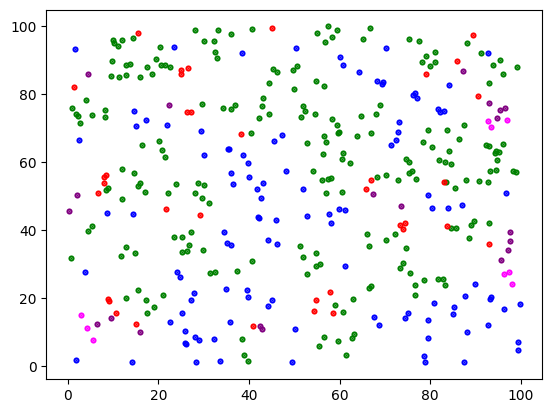

In [35]:
humanNP = np.empty(shape=[0, 4])

humanList = []


rng = np.random.default_rng(12345)


quantidadeHumanos = int(input("Quantidade de humanos na simulação: "))
tamanhoCidade = input("Tamanho da cidade no formato nxm: ").split("x")
tamanhoCidadeN, tamanhoCidadeM = int(tamanhoCidade[0]), int(tamanhoCidade[1])
pessoasInfectadasAleatorias = int(input("Quantas pessoas infectadas você quer ter inicialmente: "))
RADIUS = float(input("Qual o raio de infecção: "))
ALPHA = float(input("Taxa de infecção: "))
DAYS = int(input("Dias padrão de infecção: "))
numbers = []
k = 0
for i in range(quantidadeHumanos):
    while True:
        ri = round(np.random.uniform(0, tamanhoCidadeN), 4)
        rj = round(np.random.uniform(0, tamanhoCidadeM), 4)

        if (ri, rj) not in numbers:
            humanNP = np.append(humanNP, [[int(k), ri, rj, 0]], axis=0)
            numbers.append((ri, rj))
            k += 1
            break

listaA = []
for l in range(pessoasInfectadasAleatorias):
    numeroAleatorio = np.random.randint(0, quantidadeHumanos)
    humanNP[numeroAleatorio][-1] = DAYS
    listaA.append(humanNP[numeroAleatorio])
infectHuman = np.array(listaA)
#print(infectHuman)
#print(humanNP)
#a = input("")
imune = np.empty(shape=[0,2])

diasInput = int(input("Quantos dias você quer simular: "))
                

for k in range(diasInput):
    print(k)
    clear_output(wait=True)
    

    col = []

    for i in range(0, len(humanNP)):
    
        if humanNP[i][3] == 0:
            col.append('blue')
        elif 3 <= humanNP[i][3] <= 4:
            col.append('magenta')
        elif 1 <= humanNP[i][3] <= 2:
            col.append('purple')
        elif humanNP[i][3] < 0:
            col.append('green')
        else:
            col.append('red')


    for ll in range(len(humanNP)):
        plt.scatter(humanNP[ll][1], humanNP[ll][2], c = col[ll], s = 2, linewidth=3)
    
    plt.show()
    
    time.sleep(1)
    plt.clf()
    plt.close()
    for z in infectHuman:
        try:
            updateRowHuman(z, [z[0], z[1], z[2], z[3]-1])
        except:
            print(f"Deu ruim: {z}")
    for z in imune:
        try:
            updateRowHuman(z, [z[0], z[1]+1])
        except:
            a = input("Continuar?")
            print(f"Deu ruim: {z}") 
    checkInfect(humanNP, infectHuman)

